In [2]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [130]:
#load data and take out id columns
new_data = pd.read_csv('data/final_data.csv')
new_data1 = pd.read_csv('data/final_data.csv')
new_data2 = pd.read_csv('data/final_data.csv')
holdout = pd.read_csv('data/last_holdout.csv')

In [131]:
holdlist= ['glimepiride','troglitazone','tolazamide','examide','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone']
holdout = holdout.drop(holdlist, axis=1)


In [132]:
print(new_data.shape)
print(holdout.shape)

(84432, 44)
(14910, 44)


In [133]:
#numeric columns
num =['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency',
'number_inpatient','number_diagnoses']

In [134]:
#normalize new_data numeric columns
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(new_data[num])
new_data[num] = transformer.transform(new_data[num])
new_data[num] = pd.DataFrame(new_data[num], columns= new_data[num].columns)

In [135]:
#make id to string 
dum = ['admission_type_id','self_pay','medicaid/medicare','coverByInsurance','clustering3','clustering2','clustering4']
new_data[dum]=new_data[dum].astype(str)

In [136]:
#Dummify
new_data = pd.get_dummies(new_data, drop_first = True)
new_data.shape

(84432, 160)

In [9]:
# #Up-sample Minority Class
# from sklearn.utils import resample
# majority = new_data[new_data.target==0]
# minority = new_data[new_data.target==1]
# minority_upsampled = resample(minority,replace=True,n_samples=76847,random_state=123)
# new_data = pd.concat([majority, minority_upsampled])
# new_data.target.value_counts()

In [147]:
#Spliting to training
target = new_data.target
#drop target from training
new_data = new_data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, shuffle = True,stratify = target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(63324, 159) (63324,)
(21108, 159) (21108,)


In [148]:
# C_ = np.linspace(0.005,0.02,20)
# train_auc = []
# test_auc = []
# for c in C_:
#     logreg=LogisticRegression(C = c, class_weight='balanced')
#     logreg.fit(X_train,y_train)
#     train_auc.append(recall_score(y_train,logreg.predict(X_train)))
#     test_auc.append(recall_score(y_test,logreg.predict(X_test)))
    

In [149]:
# test_auc

In [150]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# grid={"C":np.linspace(0.005,0.02,20), "penalty":["l1"]}
# logreg=LogisticRegression(class_weight={0:1, 1:8})
# logreg_cv=GridSearchCV(logreg,grid,cv=5)
# logreg_cv.fit(X_train,y_train)

In [151]:
# logreg_cv.best_params_

In [152]:
## Fit the model with training
decision_logit = LogisticRegression(C=0.018, penalty= 'l1', random_state=0,class_weight= {0:1, 1:8})
decision_logit.fit(X_train, y_train)

## The score (accuracy for classification problems):
decision_logit.score(X_train, y_train)

0.643073716126587

In [153]:
#AUC test  
from sklearn.metrics import roc_auc_score
upsample_AUC_train =roc_auc_score(y_test, decision_logit.predict(X_test))
upsample_AUC_train

0.6112003767601475

In [154]:
#confusion matrix
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, decision_logit.predict(X_test))
array

array([[12158,  6546],
       [ 1028,  1376]])

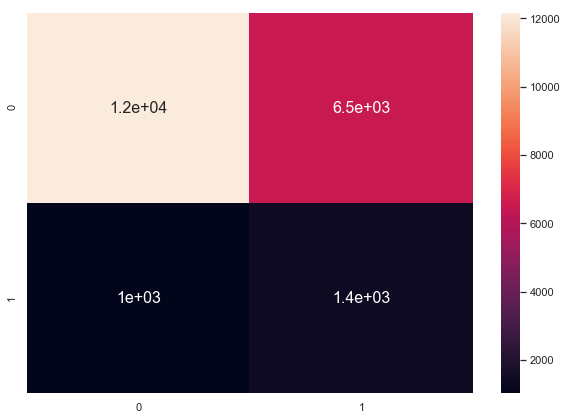

In [155]:
import seaborn as sn
df_cm = pd.DataFrame(array, range(2),
                  range(2))
plt.figure(figsize = (10,7))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [156]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
print("auc train score: ", roc_auc_score(y_train, decision_logit.predict_proba(X_train)[:,1]))
print("auc test score: ",roc_auc_score(y_test, decision_logit.predict_proba(X_test)[:,1]))
print("recall train score: ",recall_score(y_train, decision_logit.predict(X_train)))
print("recall test score: ",recall_score(y_test, decision_logit.predict(X_test)))
print("precision train score: ", precision_score(y_train, decision_logit.predict(X_train)))
print("precision test score: ",precision_score(y_test, decision_logit.predict(X_test)))
print("accuracy train score: ",accuracy_score(y_train, decision_logit.predict(X_train)))
print("accuracy test score: ",accuracy_score(y_test, decision_logit.predict(X_test)))
print(confusion_matrix(y_test, decision_logit.predict(X_test)))

auc train score:  0.6621858630781638
auc test score:  0.6527656892063269
recall train score:  0.5752322840105395
recall test score:  0.5723793677204659
precision train score:  0.17511715286866214
precision test score:  0.17369351173945974
accuracy train score:  0.643073716126587
accuracy test score:  0.6411787000189502
[[12158  6546]
 [ 1028  1376]]


In [248]:
0.1*0.8+0.9*0.8

0.8

In [137]:
#normalize hold numeric columns
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(holdout[num])
holdout[num] = transformer.transform(holdout[num])
holdout[num] = pd.DataFrame(holdout[num], columns= holdout[num].columns)

In [138]:
#make id to string 
dum = ['admission_type_id','self_pay','medicaid/medicare','coverByInsurance','clustering3','clustering2','clustering4']
holdout[dum]=holdout[dum].astype(str)

In [139]:
#Dummify
holdout = pd.get_dummies(holdout, drop_first = True)
holdout.shape

(14910, 153)

In [140]:
#Get missing columns in the training test
missing_cols = set( new_data.columns ) - set( holdout.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    holdout[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
holdout = holdout[new_data.columns]


In [141]:
holdout.shape

(14910, 160)

In [142]:
#holdout
holdx = holdout.drop('target', axis=1)
holdy = holdout.target

In [143]:
decision_logit.score(holdx, holdy)

0.5928906773977196

In [211]:

print("auc holdout score: ",roc_auc_score(holdy, decision_logit.predict_proba(holdx)[:,1]))
print("recall holdout score: ",recall_score(holdy, decision_logit.predict(holdx)))
print("precision holdout score: ",precision_score(holdy, decision_logit.predict(holdx)))
print("accuracy holdout score: ",accuracy_score(holdy, decision_logit.predict(holdx)))
print(confusion_matrix(holdy, decision_logit.predict(holdx)))

auc holdout score:  0.6609550364440713
recall holdout score:  0.75927015891701
precision holdout score:  0.1507361533068474
accuracy holdout score:  0.4851106639839034
[[5943 7268]
 [ 409 1290]]


In [13]:
#normalize new_data numeric columns
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(new_data1[num])
new_data1[num] = transformer.transform(new_data1[num])
new_data1[num] = pd.DataFrame(new_data1[num], columns= new_data1[num].columns)

In [14]:
# from sklearn.feature_selection import RFE
# model = LogisticRegression(C=0.018, penalty= 'l1', random_state=0,class_weight= {0:1, 1:8})
# rfe = RFE(model, 1)
# rfe = rfe.fit(new_data, target)
# print(rfe.n_features_)
# print(rfe.support_)
# print(rfe.ranking_)

In [33]:
df1 = pd.concat([pd.DataFrame(new_data.columns), pd.DataFrame(rfe.ranking_)], axis=1)
df1.columns = ["Col", "rfe"]
df1 = df1.sort_values(by="rfe", ascending = True)
df1

,Col,rfe
6,number_inpatient,1
145,discharge_id_22,2
149,discharge_id_5,3
140,medical_specialty_new_Orthopedics-Reconstructive,4
144,discharge_id_2,5
147,discharge_id_3,6
14,age_[10-20),7
1,num_lab_procedures,8
151,discharge_id_Other,9
109,s_diag_neoplasms,10


In [210]:
dsa = pd.qcut(decision_logit.predict_proba(new_data)[:,1],q=100)
dsa.value_counts().tail(10)

(0.625, 0.634]    845
(0.634, 0.644]    844
(0.644, 0.656]    844
(0.656, 0.669]    845
(0.669, 0.685]    844
(0.685, 0.706]    844
(0.706, 0.728]    845
(0.728, 0.757]    844
(0.757, 0.803]    844
(0.803, 0.999]    845
dtype: int64

In [231]:
predict = pd.DataFrame(decision_logit.predict_proba(new_data)[:,1])
predict.columns = ["predict"]
# predict.predict = predict.predict *100
# predict.predict = predict.predict.astype(int)

In [232]:
df = pd.concat([new_data2, predict], axis=1)

In [234]:
#ratio

percentiles = [(0.625, 0.634),(0.634, 0.644),(0.644, 0.656),(0.656, 0.669),(0.669, 0.685),(0.685, 0.706),(0.706, 0.728),(0.728, 0.757),(0.757, 0.803),(0.803, 0.999)]

for x in percentiles:
    print(df['target'][(df['predict']>x[0]) & (df['predict']<x[1])].value_counts()[1]/844)               
            

0.18127962085308058
0.23459715639810427
0.245260663507109
0.22511848341232227
0.245260663507109
0.24052132701421802
0.24052132701421802
0.28554502369668244
0.2772511848341232
0.4028436018957346


In [17]:
df['target'][df['predict']> 80].value_counts()

0    438
1    303
Name: target, dtype: int64

In [50]:
risk = range(80,101)
for i in risk:
    print(i)
    print(df['target'][df['predict']== i].value_counts())
    print("ratio",df['target'][df['predict']== i].value_counts()[1]/sum(df['target'][df['predict']== i].value_counts()))

80
0    70
1    42
Name: target, dtype: int64
ratio 0.375
81
0    56
1    35
Name: target, dtype: int64
ratio 0.38461538461538464
82
0    46
1    33
Name: target, dtype: int64
ratio 0.4177215189873418
83
0    49
1    28
Name: target, dtype: int64
ratio 0.36363636363636365
84
0    35
1    26
Name: target, dtype: int64
ratio 0.4262295081967213
85
0    41
1    23
Name: target, dtype: int64
ratio 0.359375
86
0    28
1    20
Name: target, dtype: int64
ratio 0.4166666666666667
87
0    29
1    18
Name: target, dtype: int64
ratio 0.3829787234042553
88
0    27
1    16
Name: target, dtype: int64
ratio 0.37209302325581395
89
0    18
1    10
Name: target, dtype: int64
ratio 0.35714285714285715
90
1    16
0    16
Name: target, dtype: int64
ratio 0.5
91
0    14
1    12
Name: target, dtype: int64
ratio 0.46153846153846156
92
0    15
1     7
Name: target, dtype: int64
ratio 0.3181818181818182
93
0    17
1    12
Name: target, dtype: int64
ratio 0.41379310344827586
94
0    11
1     7
Name: target, dtype

IndexError: index out of bounds

In [19]:
df1 = df[df['predict']> 80]
df1 =df1[df1['target']==1]

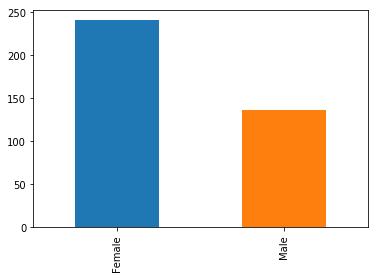

In [45]:
import matplotlib.pyplot as plt
clist = list(df1.columns)

co = clist[0]
df1[co].value_counts().plot(kind='bar')

co = clist[1]
df1[co].value_counts().plot(kind='bar')

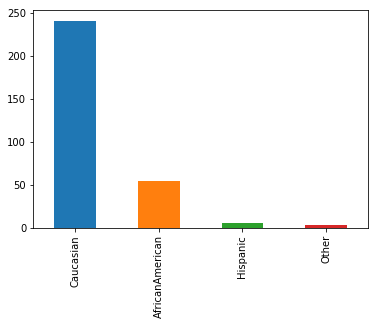

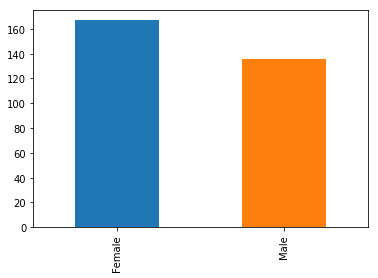

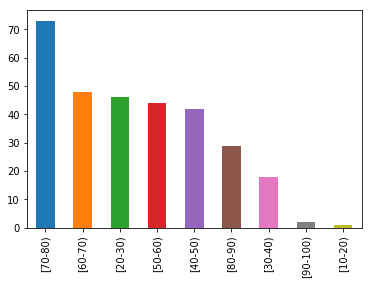

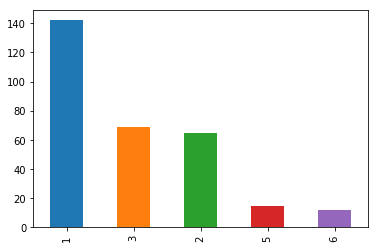

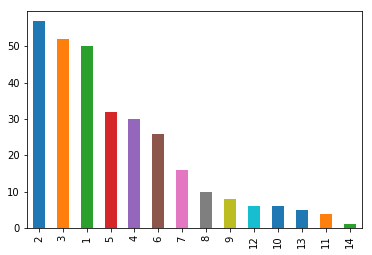

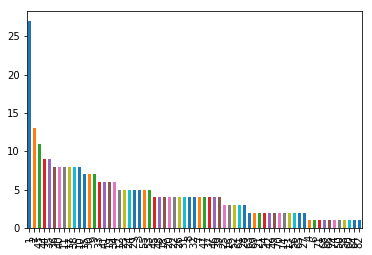

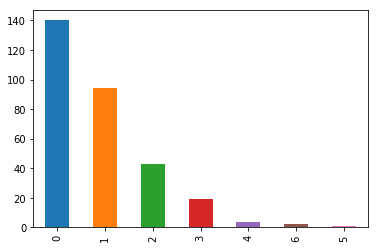

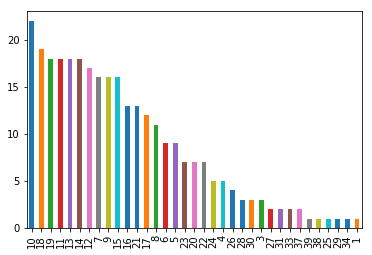

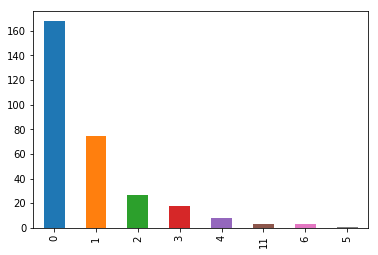

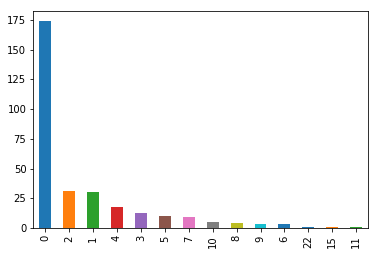

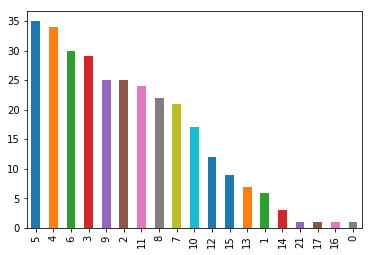

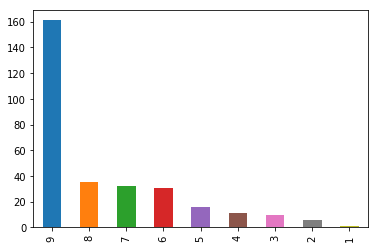

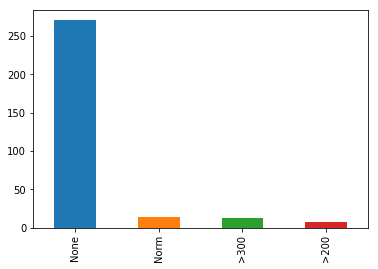

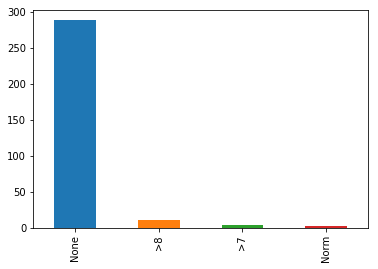

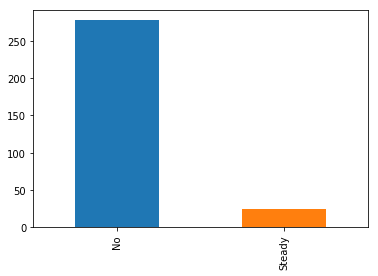

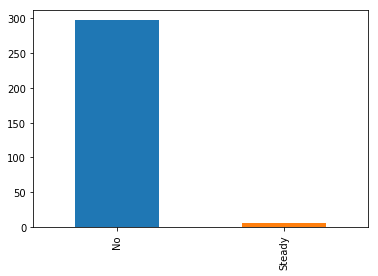

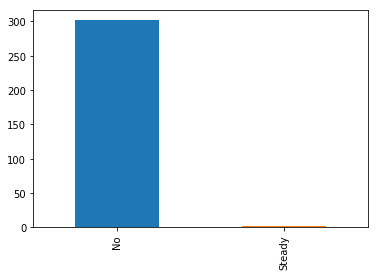

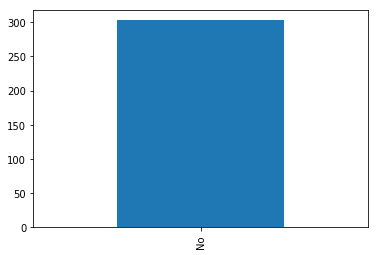

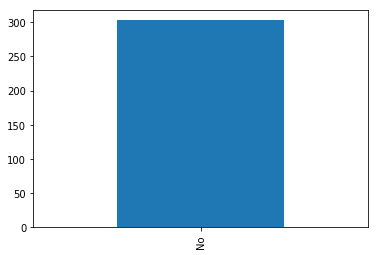

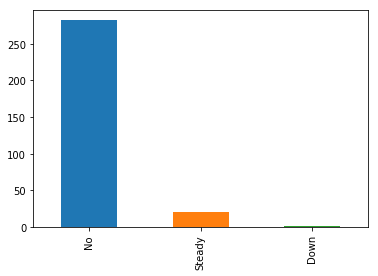

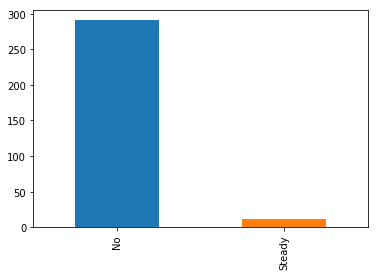

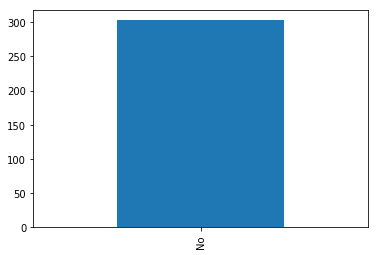

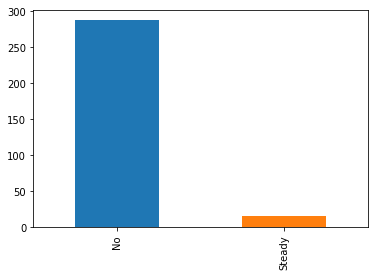

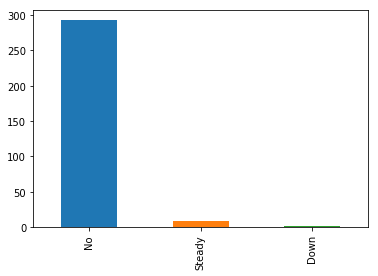

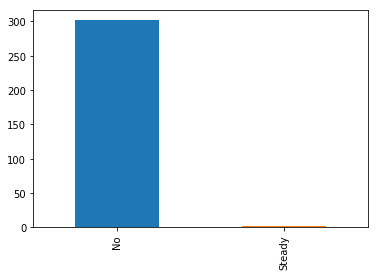

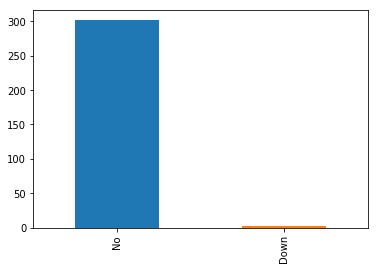

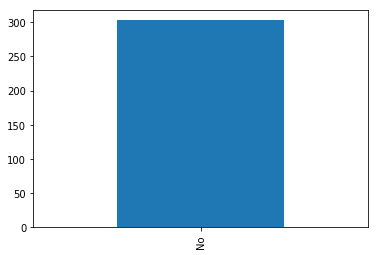

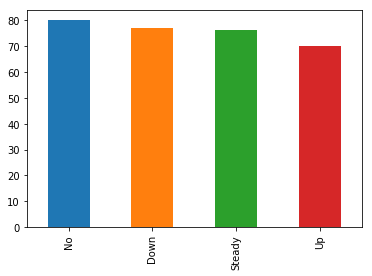

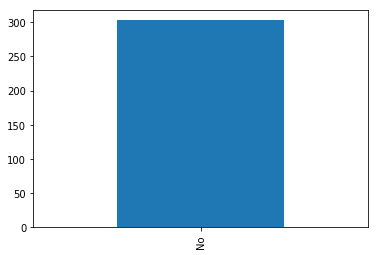

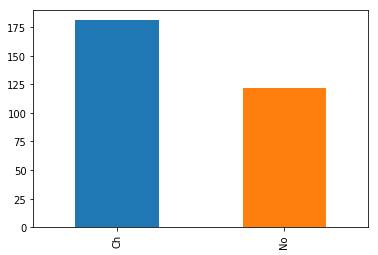

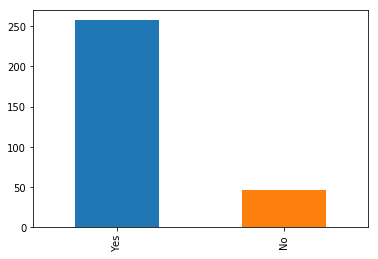

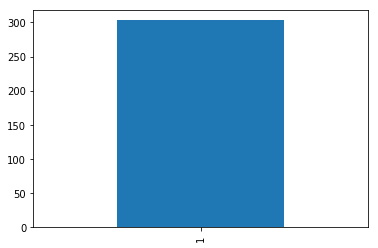

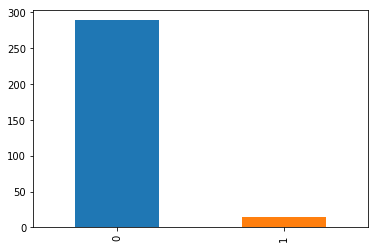

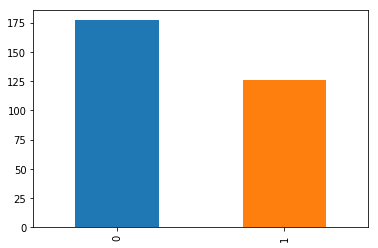

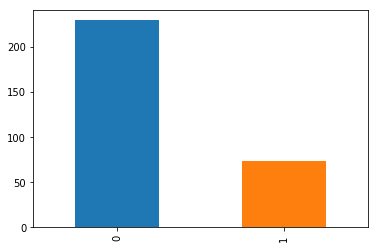

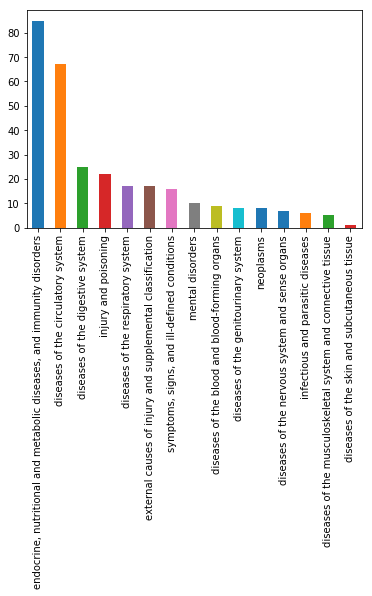

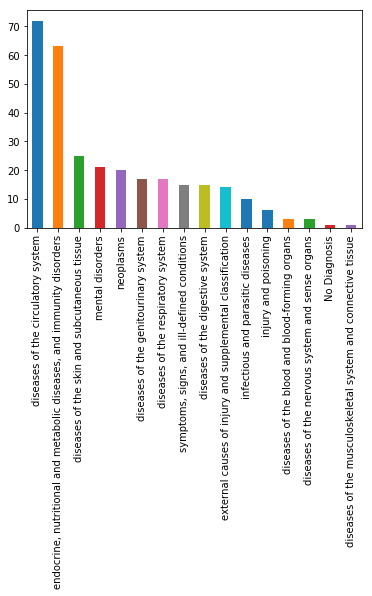

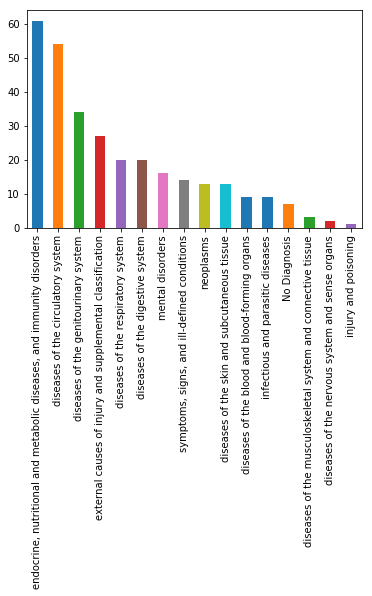

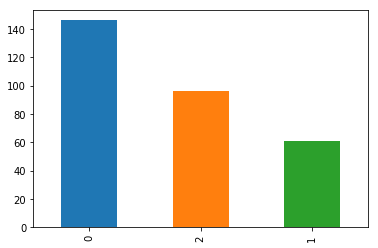

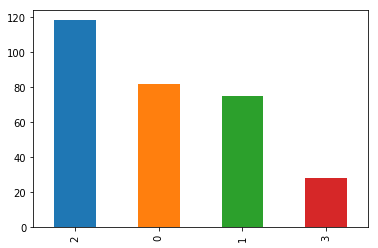

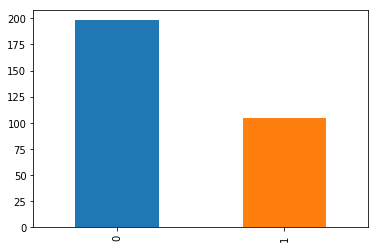

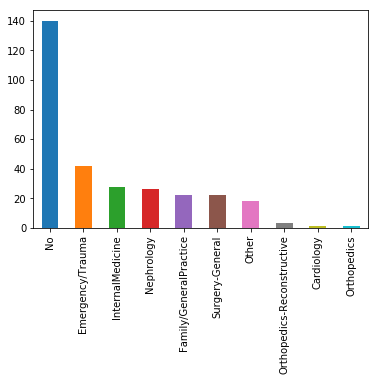

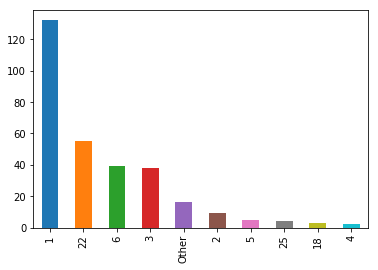

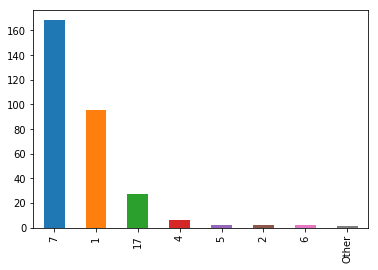

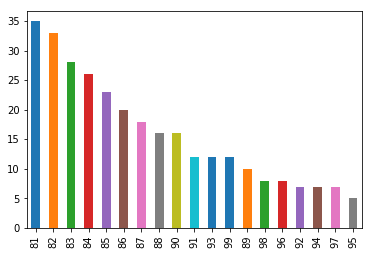

In [46]:
import matplotlib.pyplot as plt
clist = list(df1.columns)
for co in clist:
    df1[co].value_counts().plot(kind='bar')
    plt.show()